## Homework 2 :  Physics 403, S25
Aidan Meador-Woodruff (ameadorw@ur.rochester.edu)

Due: Friday 14 February, 2025

In [1]:
# Import statements. I have taken code from the deltachi2.ipynb file for problem 3.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.stats import chi2

from tqdm import trange

mpl.rc('font', size=18)

### Problem 1 : The Super Bowl
*We consider the superbowl coin toss. Of the 58 superbowls, the coin flip has been tails 30 times and heads 28 times. The NFC team won, between 1998 and 2011, 14 consecutive tosses.*

---
*a).* If the coin is fair, we want to know how long we should expect to wait before seeing another streak of 14 consecutive coin tosses. If we have a fair coin, then the probability is a half for heads or tails. We want to know how much time elapses for ending the streak on the first toss, the second toss, and the third toss, and then use induction to find this for $n$ and evaluate it for 14. 

If the streak ends on the first flip of the coin, then we must wait one year for the next superbowl to start another streak. Since the probability is a half, it will take 2 years on average to have a streak of 1. 

If the streak ends on the second flip, we have wasted 2 years (the time it takes for the previous streak). It takes 2 years per win, on average, since  $p=1/2$. So, we add on the previous streak, since we need to have a streak of one to get a streak of 2. Hence, it will take $2*2 + 2 = 6$ years on average. 

If the streak ends on the third flip, we have wasted 6 years (by ending a streak of 2). Since, again, it takes 2 years on average to win a single flip, it will take $2* 2* 2 + 6 = 14$ years on average.

If the streak ends on the fourth flip, we have wasted 14 years. Then, we have that it will take $2*2*2*2 + 14 = 30$ years on average, and so on and so forth.

This pattern is characterized inductively by 
$$T = \sum_{i=1}^n 2^i$$
for $n$ coin flips. This is alternatively expressable as
$$T = 2^{n+1}-2$$
For a streak of 14 flips, we would expect this to take
$$T = 2^{14+1} - 2 = 2^{15} -2 = 32,766 {\rm ~ years}$$
I wouldn't hold my breath on it happening again in my lifetime!

---

*b).* We want to know how likely it is that this would happen, starting now. To win 14 consecutive coin tosses with $p=1/2$, this is the probability

$$P(14) = \left(\frac{1}{2}\right)^{14} \approx 6.10\times 10^{-5}$$

The Gaussian CDF is given by 
$$\Phi(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x dt ~ e^{-t^2/2} $$

Which is alternatively related to the error function as 
$$\Phi(x) = \frac{1}{2}\left(1 + {\rm erf}\left(\frac{x}{\sqrt{2}}\right)\right)$$

Hence, we can solve for $x$ as 

$$x = \sqrt{2}~{\rm erf}^{-1}\left(2\Phi(x) - 1\right)$$
So, we solve this below:

In [22]:
from scipy.special import erfinv
# Probability is 1-Phi here and x is sigma.
Phi = 1-0.5**(14)
print(f'This corresponds to a {erfinv(2*Phi-1)*np.sqrt(2):0.3g} sigma effect.')

This corresponds to a 3.84 sigma effect.


So, not quite a 5 sigma effect, but not a common event!

### Problem 2 : The Mean, Variance, and Covariance
*We consider a random variable $x$ and constants $a$ and $b$.*

---
*a). We first wish to show that $\langle ax+b\rangle = a\langle x \rangle + b$*

By definition of the expectation value, we may write the first expression as

$$\langle ax+b\rangle = \int dx ~(ax+b) ~ p(x|I)$$
Then, we may split the integral as 
$$\int dx ~ax ~ p(x|I) + \int dx ~ b p(x|I)$$
Which is 
$$a \int dx ~ x ~ p(x|I) + b \int dx ~ p(x|I)$$
The first integral is just the expectation of $x$, and the second is 1 since the probability is normalized. Hence, we see that this is 
$$a\langle x \rangle + b$$
as desired.

Next, we wish to show that the variance of this is $a^2 {\rm var}(x)$. The variance of $ax+b$ is, by definition, 

$$ {\rm var}(ax+b) = \langle ((ax+b)-a\langle x \rangle -b)^2\rangle$$
using the above expression for the expectation. Simplifying, this becomes

$${\rm var}(ax+b) =\langle(ax - a\langle x\rangle)\rangle^2$$ 

Since $a$ is scalar, we may pull out its square from the expectation, giving us
$$a^2 \langle(x - \langle x\rangle)\rangle^2 = a^2 {\rm var}(x)$$
as desired.


*b).* Next, we consider two random variables $x$ and $y$. We wish to show that
$${\rm var}(ax+y) = a^2 {\rm var}(x) + {\rm var }(y) + 2a {\rm cov }(x,y)$$
So, the variance of a random variable is

$${\rm var}(X) = \langle X^2\rangle - \langle X \rangle^2$$
Here, our random variable $X$ is $ax+y$. The expectation of this is 
$$\langle ax+y \rangle = \langle ax \rangle + \langle y\rangle$$
by the linearity of the expectation.
Hence, he expectation of this squared is
$$\langle (ax+y)^2\rangle = \langle a^2x^2 + y^2 + 2axy\rangle$$
Which is
$$a^2 \langle x^2 \rangle + \langle y^2\rangle  + 2a\langle xy\rangle$$
The square of the expectation is
$$(a\langle x\rangle + \langle y \rangle)^2 = a^2 \langle x\rangle^2 + \langle y\rangle^2 + 2a\langle x \rangle\langle y\rangle $$

Hence, the variance of $ax+y$ is
$${\rm var}(ax+y) = a^2 \langle x^2 \rangle + \langle y^2\rangle  + 2a\langle xy\rangle  - a^2 \langle x\rangle^2 - \langle y\rangle^2 - 2a\langle x \rangle\langle y\rangle$$
Which can be grouped as
$${\rm var}(ax+y) = a^2 (\langle x^2 \rangle - \langle x \rangle^2)+ (\langle y^2\rangle- \langle y\rangle^2)  + 2a(\langle xy\rangle   -\langle x \rangle\langle y\rangle)$$

We note, by definition, the covariance between two random variables is 
$${\rm cov}(X,Y) = \langle xy \rangle - \langle x\rangle \langle y \rangle $$
So, this can all be re-expressed as 
$${\rm var}(ax+y) = a^2 {\rm var }(x)+ {\rm var}(y)  + 2a{\rm cov}(x,y)$$
as desired.


*c).* We wish to show that, if $\rho$ = ${\rm cov}(x,y)/\sigma_x\sigma_y$, that $\rho \in [-1,1]$. In this substitution, we may rewrite the above as 
$${\rm var}(ax+y) = a^2 \sigma_x^2+ \sigma_y^2 + 2a\rho \sigma_x\sigma_y$$
We first try the case that $a=\sigma_y/\sigma_x$. So, we have that the variance is 
$${\rm var}(ax+y) = \frac{\sigma_y^2}{\sigma_x^2} \sigma_x^2+ \sigma_y^2 + 2\frac{\sigma_y}{\sigma_x}\rho \sigma_x\sigma_y \geq 0$$
Simplifying
$$\sigma_y^2+ \sigma_y^2 + 2\rho \sigma_y^2 \geq 0$$
Hence, 
$$ 2\rho \sigma_y^2 \geq -2 \sigma_y^2$$
and we must have the restriction that 
$$ \rho\geq -1$$
Now, we take $a=-\frac{\sigma_x}{\sigma_y}$. The variance then becomes
$${\rm var}(ax+y) = \frac{\sigma_y^2}{\sigma_x^2} \sigma_x^2+ \sigma_y^2 -2\frac{\sigma_y}{\sigma_x}\rho \sigma_x\sigma_y \geq 0$$
Which simplifies to 
$$2\sigma_y^2 - 2 \sigma_y^2 \rho \geq 0$$
Hence
$$- 2 \sigma_y^2 \rho \geq -2 \sigma_y^2$$
and finally,
$$\rho \leq 1$$
Therefore, we have shown as desired that $\rho \in [-1,1]$.

### Problem 3 : Fitting the $\chi^2$ Distribution
*We consider the 1000 data sets generated from $y=f(x)=x$ with 10 data points below from the `deltachi2.ipynb` file.*

*a).* We first wish to calculate the $\chi^2$ assuming the model is $f(x)=x$. So, we define a linear fit function below that is just $x$:

In [3]:
def chi2x(params,x,y,sigma):
    'A riveting function.'
    return np.sum(((y - x)/sigma)**2)

Now, we calculate the $\chi^2$, which is

In [4]:
## Generating Data

# Independent variable.
N = 10
x = np.linspace(1, 10, N)
sigma_y=2
# Generate random data.
Nmc = 10000
xchi2 = []

for i in trange(0, Nmc):
    y = x+sigma_y*np.random.randn(N)
    resx = minimize(chi2x, [1], args=(x,y,sigma_y), method='BFGS')

    #resx = x
    #chi2_x = np.sum((y-resx)**2)
    #dchi2.append(chi2_x)
    if resx.success:
        xchi2.append(resx.fun)

100%|██████████| 10000/10000 [00:00<00:00, 20062.39it/s]


In [5]:
print(np.mean(xchi2), np.std(xchi2)**2)

10.031926100377289 20.09077670339347


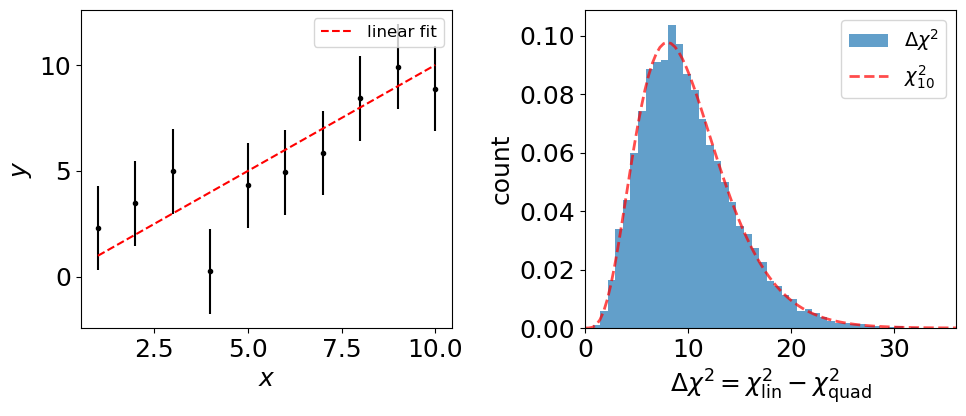

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4.5), tight_layout=True)

ax1.errorbar(x, y, yerr=sigma_y, fmt='.', color='k')
ax1.plot(x, x, 'r--', label='linear fit')

ax1.set(xlabel='$x$', ylabel='$y$')
ax1.legend(fontsize=12)

# Histogram the delta-chi2 values.
dmin = np.floor(np.min(xchi2))
dmax = np.ceil(np.max(xchi2))
ax2.hist(xchi2, bins=np.linspace(dmin, dmax, 50),
         alpha=0.7, density=True, label=r'$\Delta\chi^2$')

# Plot the chi2 function with 1 DOF.
df = 10
_x = np.linspace(dmin, dmax, 100)
rv = chi2(df)
ax2.plot(_x, rv.pdf(_x), color='r', alpha=0.7, ls='--', lw=2, label=rf'$\chi^2_{{10}}$')

ax2.set(xlabel=r'$\Delta\chi^2=\chi^2_{\mathrm{lin}}-\chi^2_{\mathrm{quad}}$',
        xlim=(dmin, dmax),
        ylabel='count')

ax2.legend(fontsize=14);

We see that the number of DoF is the mean of the $\chi^2$, which is about 10. We know that it *should* indeed be 10, as we have 10 data points and zero parameters.

*b).* Next, we wish to find the best-fit linear model, $f(x)=mx+b$ and find the $\chi^2$ doing this.

In [7]:
def chi2l(params,x,y,sigma):
    'A riveting function.'
    m,b = params
    return np.sum(((y - (m*x+b)) / sigma)**2)

# Independent variable.
N = 10
x = np.linspace(1, 10, N)

sigma_y = 2

# Generate random data.
Nmc = 10000
lchi2 = []

for i in trange(0, Nmc):
    y = x + sigma_y*np.random.randn(10)

    resl = minimize(chi2l, [1, 0], args=(x,y,sigma_y), method='BFGS')

    if resl.success:
        lchi2.append(resl.fun)

100%|██████████| 10000/10000 [00:03<00:00, 3156.40it/s]


In [8]:
print(np.mean(lchi2), np.std(lchi2)**2)

8.009118568665428 16.09438614179701


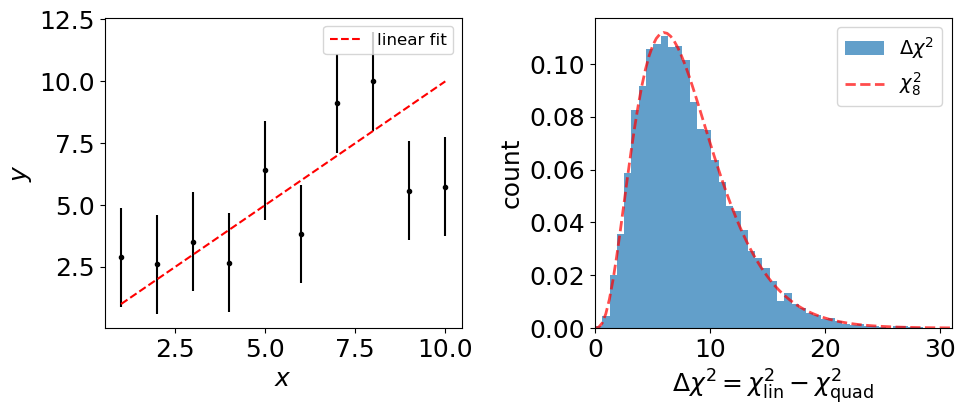

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4.5), tight_layout=True)

ax1.errorbar(x, y, yerr=sigma_y, fmt='.', color='k')
ax1.plot(x, x, 'r--', label='linear fit')

ax1.set(xlabel='$x$', ylabel='$y$')
ax1.legend(fontsize=12)

# Histogram the delta-chi2 values.
dmin = np.floor(np.min(lchi2))
dmax = np.ceil(np.max(lchi2))
ax2.hist(lchi2, bins=np.linspace(dmin, dmax, 50),
         alpha=0.7, density=True, label=r'$\Delta\chi^2$')

# Plot the chi2 function with 1 DOF.
df = 8
_x = np.linspace(dmin, dmax, 100)
rv = chi2(df)
ax2.plot(_x, rv.pdf(_x), color='r', alpha=0.7, ls='--', lw=2, label=rf'$\chi^2_{df}$')

ax2.set(xlabel=r'$\Delta\chi^2=\chi^2_{\mathrm{lin}}-\chi^2_{\mathrm{quad}}$',
        xlim=(dmin, dmax),
        ylabel='count')

ax2.legend(fontsize=14);

Here is the linear $\chi^2$. The DoF is 8 this time, as we have 2 fitting parameters over 10 data points, and 10-2=8. So, it is different from part a, as we have actual free parameters.


*c).* If we increase or decrease the error to be either too large or too small, we will get that the $\chi^2$ becomes unreasonably large or almost zero, respectively. We see this below, where we take $\sigma_y = 200$ and $\sigma_y = 0.02$.

100%|██████████| 10000/10000 [00:08<00:00, 1202.57it/s]


3.911629048065544e-05 0.0033188243014076746


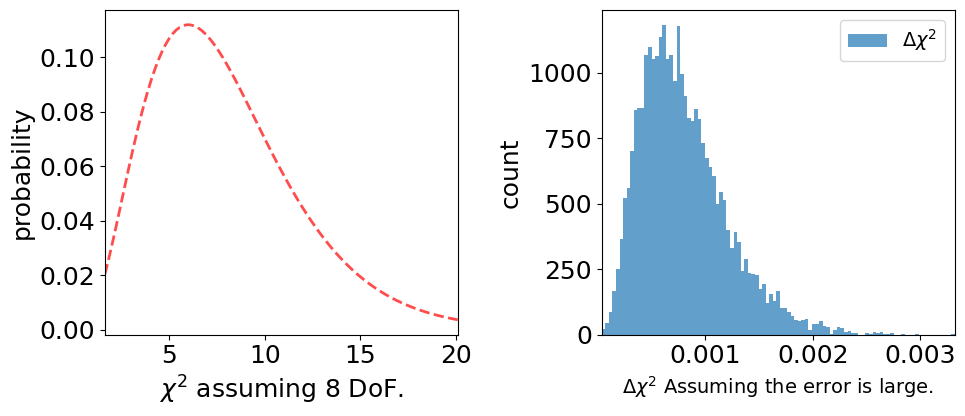

In [18]:
def chi2l(params,x,y,sigma):
    'A riveting function.'
    m,b = params
    return np.sum(((y - (m*x+b))/sigma)**2)

# Independent variable.
N = 10
x = np.linspace(1, 10, N)

sigma_y = 2
est_sigma = 200

# Generate random data.
Nmc = 10000
lchi2 = []

for i in trange(0, Nmc):
    y = x + sigma_y*np.random.randn(10)

    resl = minimize(chi2l, [1, 0], args=(x,y,est_sigma), method='BFGS')

    if resl.success:
        lchi2.append(resl.fun)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4.5), tight_layout=True)

# Histogram for a chi2 of 8 values.

df = 8
_x = np.linspace(chi2.ppf(0.01,df), chi2.ppf(0.99,df), 100)
rv = chi2(df)
ax1.plot(_x, rv.pdf(_x), color='r', alpha=0.7, ls='--', lw=2, label=rf'$\chi^2_{df}$')
ax1.set(xlabel=r'$\chi^2$ assuming 8 DoF.',
        xlim=(chi2.ppf(0.01,df), chi2.ppf(0.99,df)),
        ylabel='probability')
# Histogram the delta-chi2 values.
dmin = (np.min(lchi2))
dmax = (np.max(lchi2))
print(dmin, dmax)
ax2.hist(lchi2, bins=np.linspace(dmin, dmax, 100),
         alpha=0.7, density=True, label=r'$\Delta\chi^2$')

ax2.set_xlabel(r'$\Delta \chi^2$ Assuming the error is large.', fontsize=14)
ax2.set( xlim=(dmin, dmax),
        ylabel='count')

ax2.legend(fontsize=14);

In [11]:
print(np.mean(lchi2), np.std(lchi2)**2)

0.0008032786529827094 1.544510675543126e-07


Clearly, this is too small a $\chi^2$ given our assumptions! Now for an error that is too small:

100%|██████████| 10000/10000 [00:11<00:00, 839.36it/s]


5516.183539410788 342539.83127912536


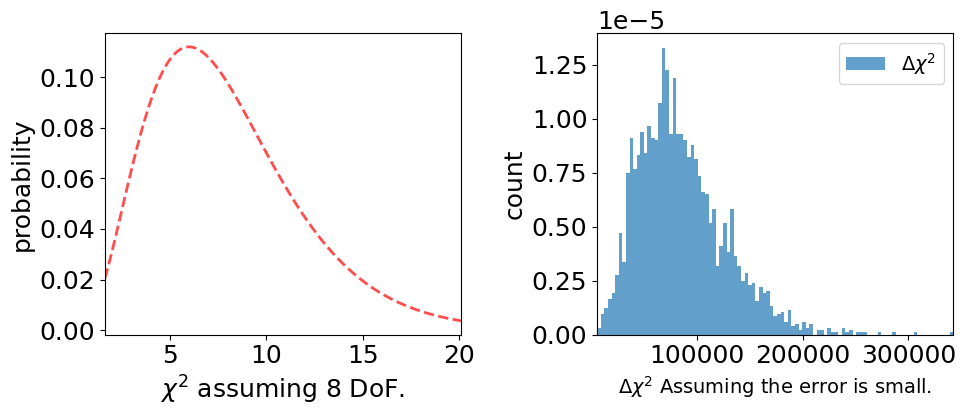

In [19]:
def chi2l(params,x,y,sigma):
    'A riveting function.'
    m,b = params
    return np.sum(((y - (m*x+b))/sigma)**2)

# Independent variable.
N = 10
x = np.linspace(1, 10, N)

sigma_y = 2
est_sigma = 0.02

# Generate random data.
Nmc = 10000
lchi2 = []

for i in trange(0, Nmc):
    y = x + sigma_y*np.random.randn(10)

    resl = minimize(chi2l, [1, 0], args=(x,y,est_sigma), method='BFGS')

    if resl.success:
        lchi2.append(resl.fun)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4.5), tight_layout=True)

# Histogram for a chi2 of 8 values.

df = 8
_x = np.linspace(chi2.ppf(0.01,df), chi2.ppf(0.99,df), 100)
rv = chi2(df)
ax1.plot(_x, rv.pdf(_x), color='r', alpha=0.7, ls='--', lw=2, label=rf'$\chi^2_{df}$')
ax1.set(xlabel=r'$\chi^2$ assuming 8 DoF.',
        xlim=(chi2.ppf(0.01,df), chi2.ppf(0.99,df)),
        ylabel='probability')
# Histogram the delta-chi2 values.
dmin = (np.min(lchi2))
dmax = (np.max(lchi2))
print(dmin, dmax)
ax2.hist(lchi2, bins=np.linspace(dmin, dmax, 100),
         alpha=0.7, density=True, label=r'$\Delta\chi^2$')

ax2.set_xlabel(r'$\Delta \chi^2$ Assuming the error is small.', fontsize=14)
ax2.set( xlim=(dmin, dmax),
        ylabel='count')

ax2.legend(fontsize=14);

In [13]:
print(np.mean(lchi2), np.std(lchi2)**2)

84461.40214567163 1697908587.9326293


An unreasonably large $\chi^2$! And not a good looking plot...